In [870]:
from visualise import _get_evoked_group_averages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config as config

In [871]:
dt = 1
efield_type_in_sim = "individual"

In [872]:
gc_values = []
types = []
P30_amplitude = []
for gc in np.arange(0, 1, 0.01):
    
    gc_ = "%.2f"%gc if gc>.5 else gc.round(2)
    tms_eeg, _ = _get_evoked_group_averages(dt, efield_type_in_sim, gc_)


    for type in tms_eeg:
        types.append(type)
        gc_values.append(gc)
        P30_amplitudes = []
        for subject_eeg in tms_eeg[type]:
            P30_amplitudes.append(np.average(subject_eeg, axis=1)[1030]) #avg over all electrodes for 1 subject and extract P30 amplitude
        P30_amplitude.append(np.average(P30_amplitudes)) #avg over all subjects


import pandas as pd
df = pd.DataFrame(
    {"Diagnosis": types, "P30_amplitude": P30_amplitude, "Global Coupling (GC)": gc_values}
)

KeyboardInterrupt: 

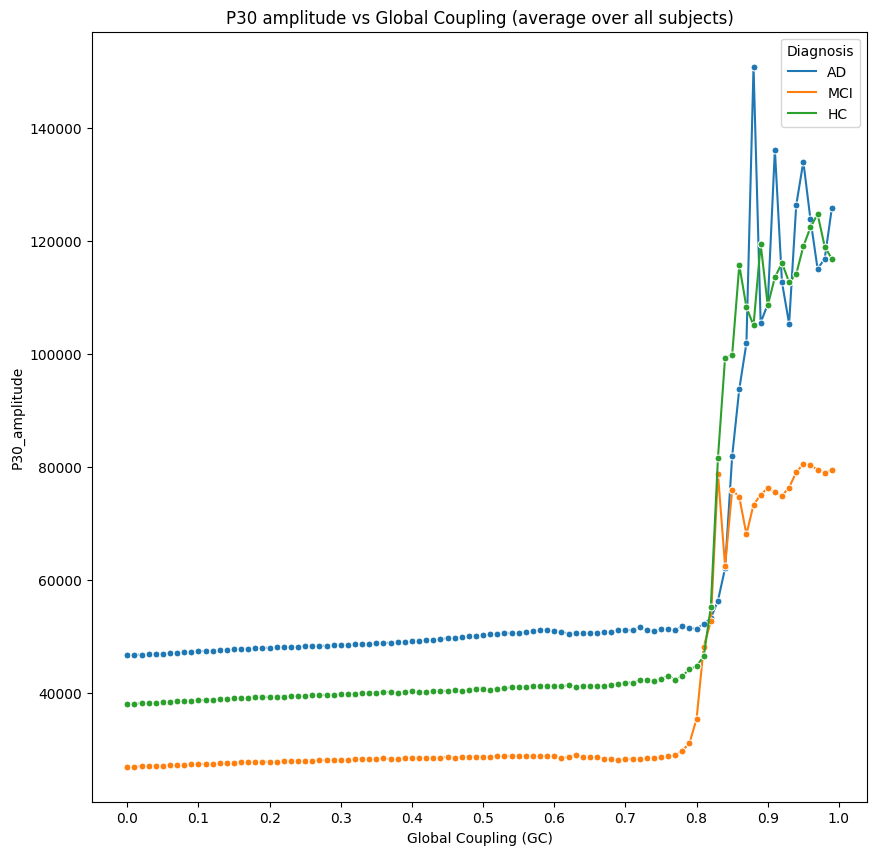

In [887]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df, linestyle='-', marker='o', markersize=5, dashes=False)
# set x axis ticks
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("P30 amplitude vs Global Coupling (average over all subjects)")
plt.show()

In [ ]:
from run_simulations import run_TMS_EEG_simulations
# /TMS-simulation/data/ADNI/AD/168_S_6142/TVB_simulation_results/group_ana_with_cutoff/gc_0.76/AD_168_S_6142_individual_efield_eeg_data_educase_lf.pkl
for gc in [.80, .90]
    run_TMS_EEG_simulations(subject='168_S_6142', type='AD', overwrite=False, global_coupling=gc, efield_type="individual", plotting=True, do_resting_state_simulation=False)

SyntaxError: invalid syntax (2785456652.py, line 3)

In [ ]:
import os
import shutil

# renaming all folders and trucating the gc value to 2 decimal places
for type in config.subjects.keys():
    for subject in config.subjects[type]:
        path = f"/media/anujanegi/Anuja Negi/TMS-simulation/data/ADNI/{type}/{subject}/TVB_simulation_results/group_ana_with_cutoff"
        folders = os.listdir(path)
        for folder in folders:
            if not os.path.exists(os.path.join(path, folder[:7])):
                os.mkdir(os.path.join(path, folder[:7]))
            shutil.move(os.path.join(path, folder), os.path.join(path, folder[:7]))
            os.rename(os.path.join(path, folder), os.path.join(path, folder[:7]))

In [ ]:
import os
import shutil

# fixing error from before and moving files
for type in config.subjects.keys():
    for subject in config.subjects[type]:
        path = f"/media/anujanegi/Anuja Negi/TMS-simulation/data/ADNI/{type}/{subject}/TVB_simulation_results/group_ana_with_cutoff"
        folders = os.listdir(path)
        for folder in folders: #in gc folder
            try:
                    
                dest = os.path.join(path, folder)
                for sub in os.listdir(dest): #subfolder
                    for f in os.listdir(os.path.join(dest, sub)): #file in subfolder
                        shutil.move(os.path.join(dest, sub, f), os.path.join(dest, f))
            except:
                pass

np.arange(0, 1, 0.1)

In [ ]:
import os
import shutil

folder = r"<MAIN FOLDER>"
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]

for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = os.path.join(folder, f)
        shutil.move(src, dst)

In [ ]:
config.subjects.keys()

dict_keys(['AD', 'MCI', 'HC'])